In [30]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt

In [31]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [32]:
tf.random.set_seed(42)
np.random.seed(42)
alpha = 0.02
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="lecun_normal"),
    keras.layers.LeakyReLU(alpha = alpha),
    keras.layers.Dense(100, kernel_initializer="lecun_normal"),
    keras.layers.LeakyReLU(alpha = alpha),
    keras.layers.Dense(10, activation="softmax")
])

In [33]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [36]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3772 - accuracy: 0.8578 - val_loss: 0.3197 - val_accuracy: 0.8798
Epoch 2/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3571 - accuracy: 0.8646 - val_loss: 0.3117 - val_accuracy: 0.8782
Epoch 3/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3473 - accuracy: 0.8697 - val_loss: 0.3270 - val_accuracy: 0.8790
Epoch 4/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3413 - accuracy: 0.8713 - val_loss: 0.3078 - val_accuracy: 0.8844
Epoch 5/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3330 - accuracy: 0.8743 - val_loss: 0.2971 - val_accuracy: 0.8922
Epoch 6/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3277 - accuracy: 0.8779 - val_loss: 0.3044 - val_accuracy: 0.8950
Epoch 7/10
1719/1719 [==============================] - 9s 6ms/step - loss: 0.3272 - accuracy: 0.8762 - val_loss: 0.2953 - val_accuracy:

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
alpha = 0.02
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(alpha = alpha),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(alpha = alpha),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

# ядро he_normal  добавила 0,012 точности

Epoch 1/10


2023-09-11 15:07:05.418699: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 172480000 exceeds 10% of free system memory.


1719/1719 [==============================] - 6s 4ms/step - loss: 1.3096 - accuracy: 0.6036 - val_loss: 0.8852 - val_accuracy: 0.7166
Epoch 2/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.7990 - accuracy: 0.7393 - val_loss: 0.7060 - val_accuracy: 0.7726
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6810 - accuracy: 0.7779 - val_loss: 0.6355 - val_accuracy: 0.7948
Epoch 4/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6188 - accuracy: 0.7977 - val_loss: 0.5788 - val_accuracy: 0.8116
Epoch 5/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5791 - accuracy: 0.8098 - val_loss: 0.5456 - val_accuracy: 0.8254
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5510 - accuracy: 0.8164 - val_loss: 0.5224 - val_accuracy: 0.8290
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5301 - accuracy: 0.8226 - val_loss: 0.5041 - val_accuracy: 0.8376
Epo

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

history = model.fit(X_train_scaled, y_train, epochs=10,
                    validation_data=(X_valid_scaled, y_valid))

# ядро нормализация убавила 0,014 точности

Epoch 1/10


2023-09-11 15:28:00.830690: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 172480000 exceeds 10% of free system memory.


1719/1719 [==============================] - 34s 17ms/step - loss: 1.3191 - accuracy: 0.4915 - val_loss: 0.8119 - val_accuracy: 0.6914
Epoch 2/10
1719/1719 [==============================] - 29s 17ms/step - loss: 1.1704 - accuracy: 0.5482 - val_loss: 0.9645 - val_accuracy: 0.6168
Epoch 3/10
1719/1719 [==============================] - 29s 17ms/step - loss: 0.8540 - accuracy: 0.6754 - val_loss: 0.7644 - val_accuracy: 0.7248
Epoch 4/10
1719/1719 [==============================] - 29s 17ms/step - loss: 0.7260 - accuracy: 0.7324 - val_loss: 0.7921 - val_accuracy: 0.7146
Epoch 5/10
1719/1719 [==============================] - 28s 16ms/step - loss: 0.6945 - accuracy: 0.7419 - val_loss: 0.6046 - val_accuracy: 0.7732
Epoch 6/10
1719/1719 [==============================] - 29s 17ms/step - loss: 0.6920 - accuracy: 0.7455 - val_loss: 0.6305 - val_accuracy: 0.7698
Epoch 7/10
1719/1719 [==============================] - 28s 16ms/step - loss: 0.6117 - accuracy: 0.7729 - val_loss: 0.5884 - val_accura

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

# ядро relu и batch_normalization  добавила 0,041 точности

Epoch 1/10


2023-09-11 15:33:09.357860: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 172480000 exceeds 10% of free system memory.


1719/1719 [==============================] - 9s 5ms/step - loss: 0.8098 - accuracy: 0.7246 - val_loss: 0.5431 - val_accuracy: 0.8150
Epoch 2/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5689 - accuracy: 0.8017 - val_loss: 0.4714 - val_accuracy: 0.8380
Epoch 3/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5153 - accuracy: 0.8213 - val_loss: 0.4404 - val_accuracy: 0.8524
Epoch 4/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4799 - accuracy: 0.8333 - val_loss: 0.4204 - val_accuracy: 0.8604
Epoch 5/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4555 - accuracy: 0.8408 - val_loss: 0.4052 - val_accuracy: 0.8654
Epoch 6/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4394 - accuracy: 0.8460 - val_loss: 0.3932 - val_accuracy: 0.8682
Epoch 7/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4262 - accuracy: 0.8500 - val_loss: 0.3832 - val_accuracy: 0.8702
Epo

In [ ]:
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # sandals or shirts
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2 # class indices 7, 8, 9 should be moved to 5, 6, 7
    y_B = (y[y_5_or_6] == 6).astype(np.float32) # binary classification task: is it a shirt (class 6)?
    return ((X[~y_5_or_6], y_A),
            (X[y_5_or_6], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))

model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

history = model_A.fit(X_train_A, y_train_A, epochs=20,
                    validation_data=(X_valid_A, y_valid_A))

Epoch 1/20
1375/1375 [==============================] - 6s 4ms/step - loss: 0.6081 - accuracy: 0.8027 - val_loss: 0.3979 - val_accuracy: 0.8592
Epoch 2/20
1375/1375 [==============================] - 5s 4ms/step - loss: 0.3608 - accuracy: 0.8747 - val_loss: 0.3284 - val_accuracy: 0.8822
Epoch 3/20
1375/1375 [==============================] - 5s 4ms/step - loss: 0.3226 - accuracy: 0.8878 - val_loss: 0.2995 - val_accuracy: 0.8969
Epoch 4/20
1375/1375 [==============================] - 5s 4ms/step - loss: 0.3024 - accuracy: 0.8951 - val_loss: 0.2850 - val_accuracy: 0.9018
Epoch 5/20
1375/1375 [==============================] - 5s 4ms/step - loss: 0.2885 - accuracy: 0.9007 - val_loss: 0.2743 - val_accuracy: 0.9073
Epoch 6/20
1375/1375 [==============================] - 5s 4ms/step - loss: 0.2783 - accuracy: 0.9047 - val_loss: 0.2686 - val_accuracy: 0.9013
Epoch 7/20
1375/1375 [==============================] - 5s 4ms/step - loss: 0.2694 - accuracy: 0.9079 - val_loss: 0.2661 - val_accuracy:

In [ ]:
model_A.save("my_model_A.h5")

model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))

model_B.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

history = model_B.fit(X_train_B, y_train_B, epochs=20,
                      validation_data=(X_valid_B, y_valid_B))

Epoch 1/20
7/7 [==============================] - 1s 37ms/step - loss: 0.3949 - accuracy: 0.8500 - val_loss: 0.3568 - val_accuracy: 0.8702
Epoch 2/20
7/7 [==============================] - 0s 19ms/step - loss: 0.3229 - accuracy: 0.9000 - val_loss: 0.2979 - val_accuracy: 0.9016
Epoch 3/20
7/7 [==============================] - 0s 20ms/step - loss: 0.2683 - accuracy: 0.9350 - val_loss: 0.2582 - val_accuracy: 0.9351
Epoch 4/20
7/7 [==============================] - 0s 20ms/step - loss: 0.2319 - accuracy: 0.9550 - val_loss: 0.2290 - val_accuracy: 0.9493
Epoch 5/20
7/7 [==============================] - 0s 19ms/step - loss: 0.2030 - accuracy: 0.9600 - val_loss: 0.2042 - val_accuracy: 0.9574
Epoch 6/20
7/7 [==============================] - 0s 19ms/step - loss: 0.1781 - accuracy: 0.9750 - val_loss: 0.1861 - val_accuracy: 0.9584
Epoch 7/20
7/7 [==============================] - 0s 20ms/step - loss: 0.1606 - accuracy: 0.9800 - val_loss: 0.1716 - val_accuracy: 0.9645
Epoch 8/20
7/7 [===========

In [ ]:
model_A = keras.models.load_model("my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])


In [ ]:
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                           validation_data=(X_valid_B, y_valid_B))

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                           validation_data=(X_valid_B, y_valid_B))

# использование замороженных слоев модели А добавила 0,17 точности и снизила ошибку на 0,43

Epoch 1/4
7/7 [==============================] - 1s 44ms/step - loss: 1.7621 - accuracy: 0.1000 - val_loss: 1.6282 - val_accuracy: 0.1694
Epoch 2/4
7/7 [==============================] - 0s 23ms/step - loss: 1.6253 - accuracy: 0.1250 - val_loss: 1.5083 - val_accuracy: 0.1978
Epoch 3/4
7/7 [==============================] - 0s 24ms/step - loss: 1.5002 - accuracy: 0.1550 - val_loss: 1.3996 - val_accuracy: 0.2231
Epoch 4/4
7/7 [==============================] - 0s 25ms/step - loss: 1.3870 - accuracy: 0.1800 - val_loss: 1.2958 - val_accuracy: 0.2677
Epoch 1/16
7/7 [==============================] - 1s 42ms/step - loss: 1.0619 - accuracy: 0.3400 - val_loss: 0.7261 - val_accuracy: 0.5152
Epoch 2/16
7/7 [==============================] - 0s 24ms/step - loss: 0.6078 - accuracy: 0.6250 - val_loss: 0.4923 - val_accuracy: 0.7505
Epoch 3/16
7/7 [==============================] - 0s 25ms/step - loss: 0.4174 - accuracy: 0.8450 - val_loss: 0.3701 - val_accuracy: 0.8641
Epoch 4/16
7/7 [===============

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
alpha = 0.02
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="lecun_normal"),
    keras.layers.LeakyReLU(alpha = alpha),
    keras.layers.Dense(100, kernel_initializer="lecun_normal"),
    keras.layers.LeakyReLU(alpha = alpha),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adamax(learning_rate=1e-3, beta_1=0.9, beta_2=0.999),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

# Adamax добавил 0,0646 точности

Epoch 1/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5196 - accuracy: 0.8183 - val_loss: 0.3943 - val_accuracy: 0.8632
Epoch 2/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3865 - accuracy: 0.8627 - val_loss: 0.3900 - val_accuracy: 0.8608
Epoch 3/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3462 - accuracy: 0.8746 - val_loss: 0.3358 - val_accuracy: 0.8816
Epoch 4/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3180 - accuracy: 0.8844 - val_loss: 0.3188 - val_accuracy: 0.8836
Epoch 5/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2995 - accuracy: 0.8901 - val_loss: 0.3015 - val_accuracy: 0.8882
Epoch 6/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.2853 - accuracy: 0.8959 - val_loss: 0.3174 - val_accuracy: 0.8856
Epoch 7/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2733 - accuracy: 0.8994 - val_loss: 0.2977 - val_accuracy:

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
alpha = 0.02
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="lecun_normal"),
    keras.layers.LeakyReLU(alpha = alpha),
    keras.layers.Dense(100, kernel_initializer="lecun_normal"),
    keras.layers.LeakyReLU(alpha = alpha),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Nadam(learning_rate=1e-3, beta_1=0.9, beta_2=0.999),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

# Nadam добавил 0,0658 точности

Epoch 1/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4650 - accuracy: 0.8329 - val_loss: 0.3503 - val_accuracy: 0.8714
Epoch 2/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3530 - accuracy: 0.8706 - val_loss: 0.3567 - val_accuracy: 0.8718
Epoch 3/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3225 - accuracy: 0.8800 - val_loss: 0.3241 - val_accuracy: 0.8776
Epoch 4/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2976 - accuracy: 0.8899 - val_loss: 0.3042 - val_accuracy: 0.8852
Epoch 5/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2816 - accuracy: 0.8942 - val_loss: 0.3036 - val_accuracy: 0.8876
Epoch 6/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2674 - accuracy: 0.9009 - val_loss: 0.3246 - val_accuracy: 0.8864
Epoch 7/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2562 - accuracy: 0.9043 - val_loss: 0.3141 - val_accuracy:

In [ ]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25

lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

# экспоненциальное изменение lr добавило 0,1308 точности

Epoch 1/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7632 - accuracy: 0.7733 - val_loss: 0.7204 - val_accuracy: 0.7956 - lr: 0.0100
Epoch 2/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.6402 - accuracy: 0.8037 - val_loss: 0.5509 - val_accuracy: 0.8304 - lr: 0.0089
Epoch 3/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.6089 - accuracy: 0.8181 - val_loss: 0.6292 - val_accuracy: 0.8340 - lr: 0.0079
Epoch 4/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5683 - accuracy: 0.8293 - val_loss: 0.6338 - val_accuracy: 0.8236 - lr: 0.0071
Epoch 5/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5198 - accuracy: 0.8406 - val_loss: 0.5579 - val_accuracy: 0.8498 - lr: 0.0063
Epoch 6/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4573 - accuracy: 0.8582 - val_loss: 0.4695 - val_accuracy: 0.8650 - lr: 0.0056
Epoch 7/25
1719/1719 [==============================] - 8s

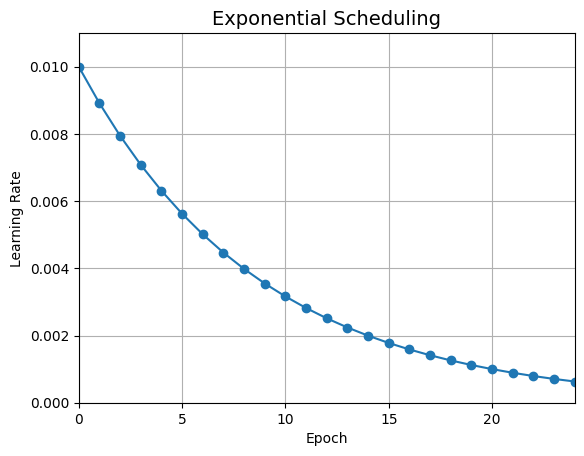

In [ ]:
plt.plot(history.epoch, history.history["lr"], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
def piecewise_constant(boundaries, values):
    boundaries = np.array([0] + boundaries)
    values = np.array(values)
    def piecewise_constant_fn(epoch):
        return values[np.argmax(boundaries > epoch) - 1]
    return piecewise_constant_fn

piecewise_constant_fn = piecewise_constant([5, 15], [0.01, 0.005, 0.001])


lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

# шаговое изменение lr добавило 0,1049 точности

Epoch 1/25
1719/1719 [==============================] - 10s 5ms/step - loss: 0.7401 - accuracy: 0.7791 - val_loss: 0.7127 - val_accuracy: 0.8182 - lr: 0.0100
Epoch 2/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7044 - accuracy: 0.7865 - val_loss: 0.7375 - val_accuracy: 0.7928 - lr: 0.0100
Epoch 3/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.8949 - accuracy: 0.7219 - val_loss: 1.1802 - val_accuracy: 0.6516 - lr: 0.0100
Epoch 4/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.8921 - accuracy: 0.7086 - val_loss: 1.0141 - val_accuracy: 0.6454 - lr: 0.0100
Epoch 5/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.8041 - accuracy: 0.7559 - val_loss: 0.8290 - val_accuracy: 0.7882 - lr: 0.0100
Epoch 6/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5578 - accuracy: 0.8188 - val_loss: 0.5617 - val_accuracy: 0.8374 - lr: 0.0050
Epoch 7/25
1719/1719 [==============================] - 8

Epoch 1/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4828 - accuracy: 0.8287 - val_loss: 0.3826 - val_accuracy: 0.8618 - lr: 0.0100
Epoch 2/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3652 - accuracy: 0.8679 - val_loss: 0.3944 - val_accuracy: 0.8648 - lr: 0.0100
Epoch 3/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3304 - accuracy: 0.8771 - val_loss: 0.3410 - val_accuracy: 0.8786 - lr: 0.0100
Epoch 4/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3075 - accuracy: 0.8874 - val_loss: 0.3585 - val_accuracy: 0.8808 - lr: 0.0100
Epoch 5/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2850 - accuracy: 0.8941 - val_loss: 0.3237 - val_accuracy: 0.8876 - lr: 0.0100
Epoch 6/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2677 - accuracy: 0.9005 - val_loss: 0.3805 - val_accuracy: 0.8768 - lr: 0.0100
Epoch 7/25
1719/1719 [==============================] - 6s

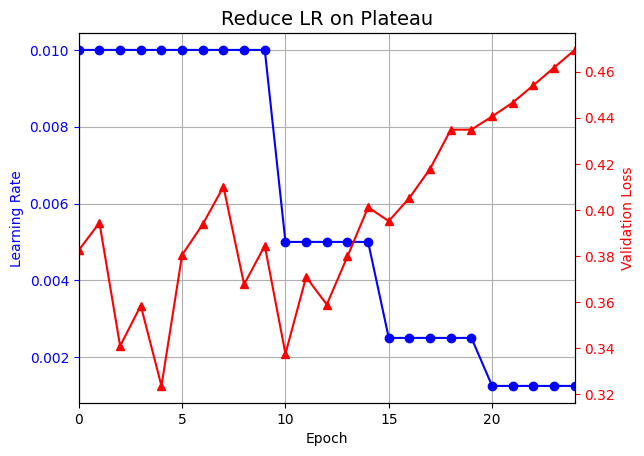

In [ ]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(lr=0.02, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

plt.plot(history.epoch, history.history["lr"], "bo-")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, n_epochs - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')

plt.title("Reduce LR on Plateau", fontsize=14)
plt.show()

# уменьшение скорости обучения с коэффициентом λ добавило 0,1599 точности но увеличило разрыв с валидацией на 0,1. Оптимально 13 эпох

In [ ]:
from functools import partial

RegularizedDense = partial(keras.layers.Dense,
                           activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 10
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

# слои с регуляризацией добавили 0,007 точности но при этом стабильно больший результат на валидации

Epoch 1/10
1719/1719 [==============================] - 10s 5ms/step - loss: 1.6478 - accuracy: 0.8143 - val_loss: 0.7093 - val_accuracy: 0.8408
Epoch 2/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.7227 - accuracy: 0.8270 - val_loss: 0.6953 - val_accuracy: 0.8316
Epoch 3/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.7059 - accuracy: 0.8313 - val_loss: 0.6915 - val_accuracy: 0.8370
Epoch 4/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.6992 - accuracy: 0.8346 - val_loss: 0.6772 - val_accuracy: 0.8452
Epoch 5/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.6936 - accuracy: 0.8376 - val_loss: 0.6663 - val_accuracy: 0.8446
Epoch 6/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.6903 - accuracy: 0.8363 - val_loss: 0.6674 - val_accuracy: 0.8480
Epoch 7/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.6879 - accuracy: 0.8377 - val_loss: 0.6626 - val_accuracy

In [35]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 10
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

# слои с dropout добавили 0,475 точности но при этом стабильно больший результат на валидации

Epoch 1/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.5791 - accuracy: 0.8019 - val_loss: 0.3654 - val_accuracy: 0.8662
Epoch 2/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4256 - accuracy: 0.8444 - val_loss: 0.3429 - val_accuracy: 0.8682
Epoch 3/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3933 - accuracy: 0.8522 - val_loss: 0.3520 - val_accuracy: 0.8724
Epoch 4/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3752 - accuracy: 0.8605 - val_loss: 0.3211 - val_accuracy: 0.8816
Epoch 5/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3594 - accuracy: 0.8675 - val_loss: 0.3104 - val_accuracy: 0.8846
Epoch 6/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3490 - accuracy: 0.8713 - val_loss: 0.3183 - val_accuracy: 0.8826
Epoch 7/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3419 - accuracy: 0.8732 - val_loss: 0.3182 - val_accurac

In [37]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 20
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

# слои с alphadropout на 10 эпохе снизили точность 

Epoch 1/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.6670 - accuracy: 0.7594 - val_loss: 0.6164 - val_accuracy: 0.8354
Epoch 2/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5591 - accuracy: 0.7939 - val_loss: 0.5637 - val_accuracy: 0.8482
Epoch 3/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5276 - accuracy: 0.8059 - val_loss: 0.5340 - val_accuracy: 0.8504
Epoch 4/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5087 - accuracy: 0.8114 - val_loss: 0.4608 - val_accuracy: 0.8646
Epoch 5/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4910 - accuracy: 0.8179 - val_loss: 0.4708 - val_accuracy: 0.8604
Epoch 6/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4797 - accuracy: 0.8213 - val_loss: 0.4730 - val_accuracy: 0.8598
Epoch 7/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4725 - accuracy: 0.8242 - val_loss: 0.4672 - val_accuracy:

In [39]:
MaxNormDense = partial(keras.layers.Dense,
                       activation="selu", kernel_initializer="lecun_normal",
                       kernel_constraint=keras.constraints.max_norm(1.))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    MaxNormDense(300),
    MaxNormDense(100),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 10
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

# слои с MaxNormDense повысили  точность на 0,543. но снизились валидация

Epoch 1/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4735 - accuracy: 0.8345 - val_loss: 0.3701 - val_accuracy: 0.8646
Epoch 2/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3600 - accuracy: 0.8690 - val_loss: 0.3971 - val_accuracy: 0.8606
Epoch 3/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3359 - accuracy: 0.8756 - val_loss: 0.3574 - val_accuracy: 0.8744
Epoch 4/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3222 - accuracy: 0.8799 - val_loss: 0.3498 - val_accuracy: 0.8710
Epoch 5/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3179 - accuracy: 0.8825 - val_loss: 0.3371 - val_accuracy: 0.8784
Epoch 6/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3126 - accuracy: 0.8850 - val_loss: 0.3430 - val_accuracy: 0.8792
Epoch 7/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3102 - accuracy: 0.8837 - val_loss: 0.3375 - val_accur